In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 色々なplotを描く

### 散布図 plt.scatter()

In [8]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

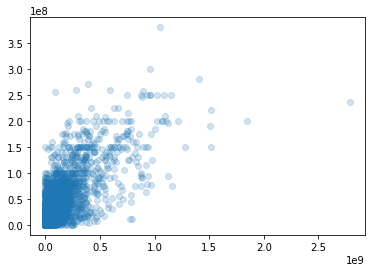

In [9]:
#散布図を描く
#plot同士が重なるのを避けるためにalphaを指定する
#0-1 0に近い方が透明度が高い
plt.scatter(df['revenue'], df['budget'], alpha=0.2)

In [13]:
#散布図２
#各言語によってグループ化
#revenueとbudgetの平均値を取る

#revenueとbudgetが０の物を省く
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
#original_languageでグループ化した後、revenueとbudgetとvote_countの平均値を取得する
#(vote_countはscatterの大きさを決めるのに使用する)
df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]

,budget,revenue,vote_count
original_language,,,
af,3.000000e+06,9.879971e+06,94.000000
cn,1.984339e+07,6.296073e+07,327.000000
da,1.510000e+07,5.232305e+07,703.250000
de,2.019886e+07,4.159554e+07,609.555556
en,4.166120e+07,1.245451e+08,998.277885
es,1.027506e+07,3.362737e+07,521.866667
fa,1.800000e+05,9.000000e+05,112.000000
fr,1.786534e+07,3.292465e+07,371.320000
he,2.000000e+06,1.112585e+07,291.000000


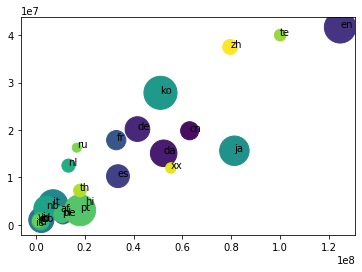

In [27]:
lang_group_df = df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]
c = np.arange(len(lang_group_df)) #色を決める（数字を指定すると、matpoltlibが色を決めてくれる）
#s: scatterの大きさを指定する
#c: scatterの色を指定する
plt.scatter('revenue', 'budget', s='vote_count', c=c, data=lang_group_df)
#scatter上に指定したテキストを表示する
#s: 表示したいテキスト
#xy: sを表示する座標（タプルで指定する）
for idx, row in lang_group_df.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget'])) 

### ヒストグラム plt.hist()

(array([ 63.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   6.,
          4.,   0.,   6.,   5.,  17.,  20.,  12.,  23.,  12.,  38.,  49.,
         99., 107.,  63., 146., 198., 423., 340., 196., 417., 407., 615.,
        385., 160., 298., 244., 237.,  92.,  32.,  68.,   7.,   4.,   0.,
          0.,   0.,   1.,   1.,   0.,   4.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

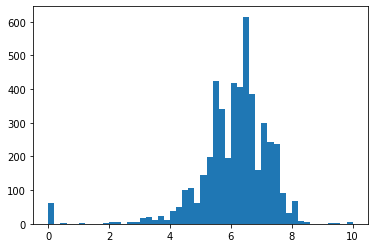

In [35]:
#横軸: 階級（bin）
#縦軸: 度数(frequency)
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
#xのみ指定すれば、あとはデフォルト値が入っている
plt.hist(df['vote_average'], bins=50)

(array([2.483e+03, 5.840e+02, 1.080e+02, 4.300e+01, 6.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.65710090e+08,  1.05957428e+08,  3.77624945e+08,  6.49292463e+08,
         9.20959981e+08,  1.19262750e+09,  1.46429502e+09,  1.73596253e+09,
         2.00763005e+09,  2.27929757e+09,  2.55096509e+09]),
 <a list of 10 Patch objects>)

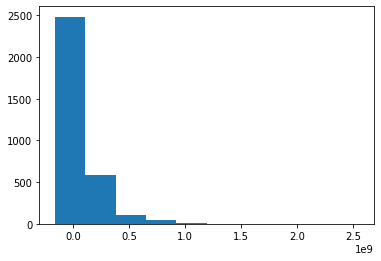

In [42]:
#profit(revenue - budget)のヒストグラム
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
#各行にapplyさせるにはaxis=1を指定する
df['profit'] = df.apply(lambda row: row['revenue']-row['budget'], axis=1)
plt.hist(df['profit'])

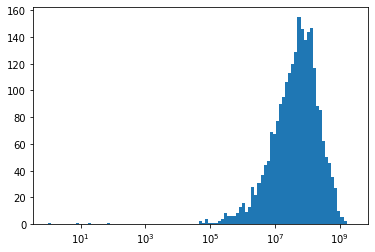

In [54]:
#figureオブジェクトを使用してヒストグラムを描く
fig, axes = plt.subplots(1, 1)
#profitにかなり差があるので、binにログスケール(階乗)を指定する
#logspaceを使うためには最大値を決めなくてはならない
#ここでの最大値はprofitの最大値(「アバター」のprofit)
logbins = np.logspace(0, np.log10(df['profit'].max()), 100)
axes.hist(df['profit'], bins=logbins)
#表示もリニアではなくログスケールにする
axes.set_xscale('log')

In [53]:
np.logspace(0, np.log10(df['profit'].max()), 100)

array([1.00000000e+00, 1.24456395e+00, 1.54893943e+00, 1.92775417e+00,
       2.39921335e+00, 2.98597445e+00, 3.71623615e+00, 4.62509355e+00,
       5.75622470e+00, 7.16398975e+00, 8.91604339e+00, 1.10965862e+01,
       1.38104111e+01, 1.71879398e+01, 2.13914903e+01, 2.66230777e+01,
       3.31341228e+01, 4.12375347e+01, 5.13227492e+01, 6.38744435e+01,
       7.94958297e+01, 9.89376439e+01, 1.23134225e+02, 1.53248417e+02,
       1.90727456e+02, 2.37372516e+02, 2.95425276e+02, 3.67675649e+02,
       4.57595858e+02, 5.69507309e+02, 7.08788267e+02, 8.82132325e+02,
       1.09787009e+03, 1.36636954e+03, 1.70053427e+03, 2.11642365e+03,
       2.63402458e+03, 3.27821204e+03, 4.07994453e+03, 5.07775188e+03,
       6.31958694e+03, 7.86513009e+03, 9.78865738e+03, 1.21826101e+04,
       1.51620373e+04, 1.88701251e+04, 2.34850775e+04, 2.92286808e+04,
       3.63769624e+04, 4.52734561e+04, 5.63457113e+04, 7.01258411e+04,
       8.72760939e+04, 1.08620680e+05, 1.35185383e+05, 1.68246854e+05,
      

### 棒グラフ plt.bar()

In [5]:
df = pd.DataFrame({'categorical': ['A', 'B', 'C'], 'val':[10, 30, 20]})
df

,categorical,val
0,A,10
1,B,30
2,C,20


<BarContainer object of 3 artists>

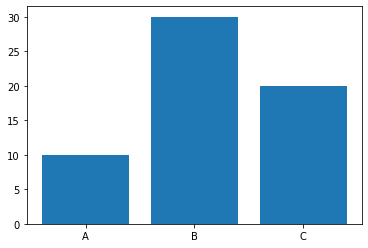

In [9]:
#描き方１ データを渡す
plt.bar('categorical', 'val', data=df)

<BarContainer object of 3 artists>

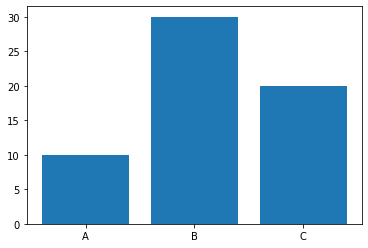

In [11]:
#描き方２ Seriesで渡す
plt.bar(df['categorical'], df['val'])

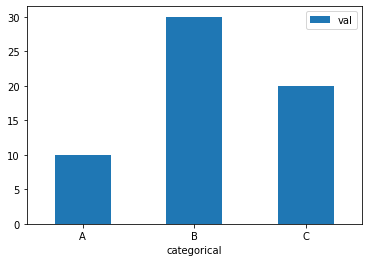

In [15]:
#描き方３ DataFrameにbuild inする方法（棒グラフを描く時にはよく使う方法）
#kind(どんなグラフを描きたいか)を指定する
#xのティックスが左９０度に傾くので、rotを指定する
df.plot('categorical', 'val', kind='bar', rot=0)

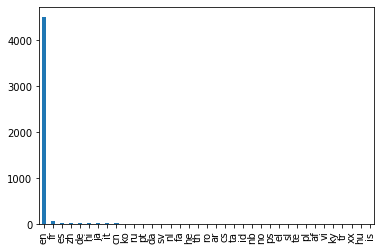

In [17]:
#棒グラフはどんな時に描かれるか？
#カテゴリ分けしたあと、それらの値を一目でわかるような図にしたいときとか
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
#Seriesに対してもplotは使える
df['original_language'].value_counts().plot(kind='bar')

### 箱ひげ図 boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x4052ffd050>,
 'caps': [<matplotlib.lines.Line2D at 0x4052ffdb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x4052ffa390>],
 'medians': [<matplotlib.lines.Line2D at 0x4053001590>],
 'fliers': [<matplotlib.lines.Line2D at 0x4053001a90>],
 'means': []}

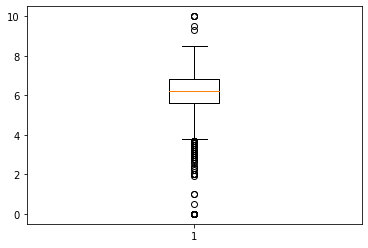

In [19]:
#箱: 下-第１四分位点(lower quartile) 真ん中-中央値(median) 上-第3四分位点(upper quartile)
#ひげ(whisker): 
#外れ値(outlier)

df = pd.read_csv('dataset/tmdb_5000_movies.csv')
#plt.boxplot('vote_average', data=df) <-こちらの描き方もできる
plt.boxplot(df['vote_average'])

## plotを保存する

### サイズを指定してplotする

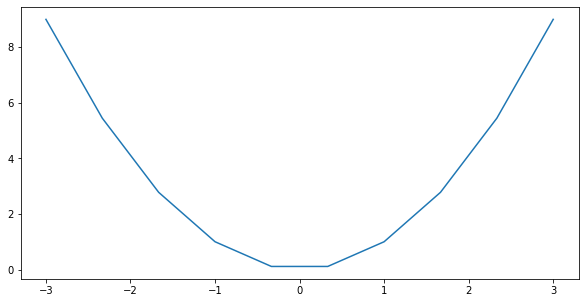

In [24]:
x = np.linspace(-3, 3, 10)
#p;lotのサイズを指定する(単位はinch)
plt.figure(figsize=(10, 5))
plt.plot(x, x**2)

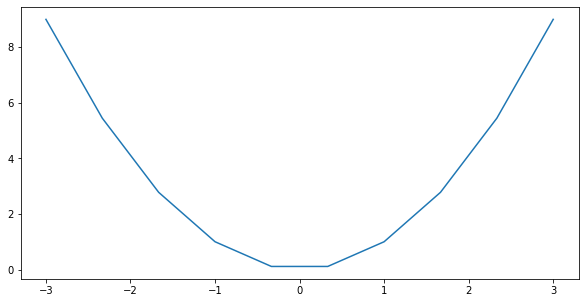

In [26]:
#オブジェクト指向で指定する
fig, axes = plt.subplots(figsize=(10,5))
axes.plot(x, x**2)

### pngで保存する savefig()

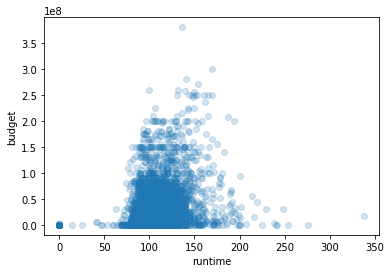

In [30]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')
plt.scatter('runtime', 'budget', data=df, alpha=0.2)
plt.xlabel('runtime')
plt.ylabel('budget')
#保存する
plt.savefig('figure/runtime_budget_scatter.png')

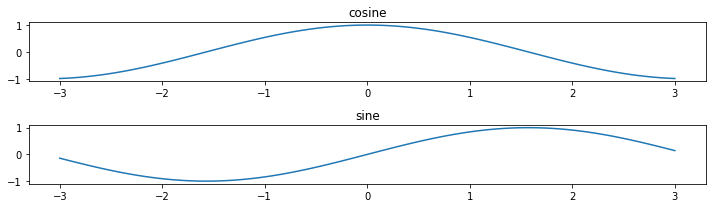

In [37]:
#オブジェクト指向の描き方
fig, axes = plt.subplots(2, 1, figsize=(10, 3))
x = np.linspace(-3, 3, 100)
axes[0].set_title('cosine')
axes[0].plot(x, np.cos(x)) #コサイン
axes[1].set_title('sine')
axes[1].plot(x, np.sin(x)) #サイン
fig.tight_layout() #ラベルの重なりを解消する
fig.savefig('figure/cos_sin.png')

### PDFで保存する

In [39]:
from matplotlib.backends.backend_pdf import PdfPages

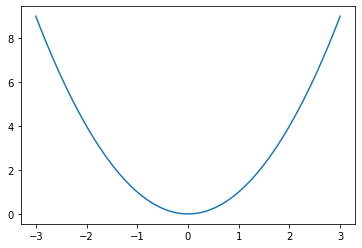

In [47]:
#PDFのインスタンス生成(PDFファイルは開いている状態)
pdf = PdfPages('figure/pdf_files.pdf')
#plotの作成
fig, axes = plt.subplots()
axes.plot(x, x**2)
#PDFに保存
pdf.savefig(fig)
#PDFファイルを閉じる
pdf.close()

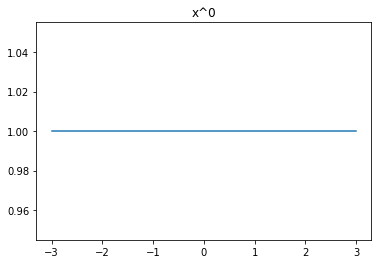

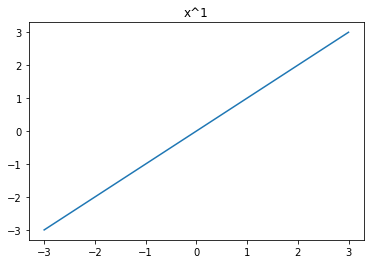

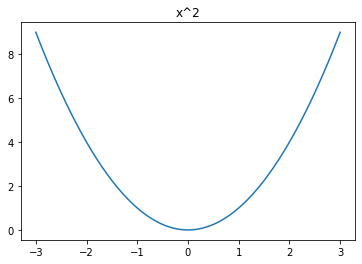

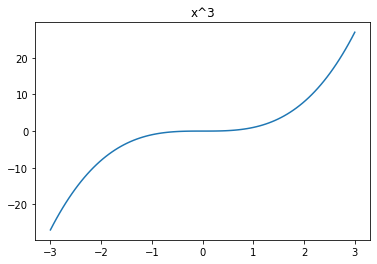

In [ ]:
#PDFに複数のplotを保存する
pdf = PdfPages('figure/savemultifig_sample.pdf')
for i in range(10):
    fig, axes = plt.subplots()
    axes.plot(x, x**i)
    axes.set_title('x^{}'.format(i))
    #figを毎回PDFに保存していく
    pdf.savefig(fig)
#全て実行されたらPDFファイルを閉じる
pdf.close()